# 代码

## thinking

1. first, try to represent the data in the form of a graphy. 首先尝试以图的形式将数据表示起来。
   - completed.
2. second, display the resault in the map.然后将其在地图上表示出来。
   - completed. but has some problems.
3. reproduce paper.

## datas

1. Foursquare dataset ../../data/Foursqare/dataset_TSMC2014_NYC.csv the foursquare data in Newyork. the data source is [Foursquare dataset](https://www.kaggle.com/chetanism/foursquare-nyc-and-tokyo-checkin-dataset).

## problems

1. when "import fiona" , will be reported that :module 'fiona' has no attribute '_loading'. 
   - because: you should restart python kernel. should restart vscode.
   - references: [pay attention to answer 2](https://stackoverflow.com/questions/66994079/attributeerror-module-fiona-has-no-attribute-loading). "If you are using Jupyter Notebook or JupyterLab, you may just need to restart the kernel for the environment."
   - references: You must install geopandas dependent libraries in order. The order is : gdal, fiona, shapely, rtree, geopandas.[install order reference site](https://www.bilibili.com/video/BV1Np4y1q77Q?from=search&seid=5195043200341706458&spm_id_from=333.337.0.0). [the dependent libraries site](https://www.lfd.uci.edu/~gohlke/pythonlibs/).
  
   |number|name|version|
   |---|---|---|
   |1|python|3.7 x64|
   |2|gdal|3.4.1|
   |3|fiona|1.8.20|
   |4|shapely|1.8.0|
   |5|Rtree|0.9.7|
   |6|geopandas|0.10.2|
   
   - Code to determine whether the dependent library is in the system.
   ```Python
   import sys 
   'fiona' in sys.modules
   ```
2. geopandas.explore() needs mapclassify and folium libraries. mapclassify depends on networkx.
3. geopandas.explore() reports "make the notebook trusted to load map:" ,[ you should wait](https://blog.csdn.net/weixin_47807140/article/details/113248778). 



In [1]:
# 引用库

# 基础库
import os
import time
from datetime import date, datetime
import datetime

# 数据处理
import re # 正则化处理
import string
from random import randint
import pandas as pd
import numpy as np
from sklearn import preprocessing
import sklearn 
# 数据预处理
from numpy import polyfit, poly1d, polyval
from pandas.core.frame import DataFrame
from math import ceil
import math

# 可视化
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

# 地理数据
import geopandas as gpd
# import fiona

%matplotlib inline

In [2]:
def DisplayStartInfo():
    """
    :description: 显示开始时间。
    :param None {type: None}: 
    :return startTime {type: datetime.datetime}{count: 1}: 返回当前时间。
    """
    print("-------------------------Start-------------------------")
    startTime = datetime.datetime.now()
    print(startTime.strftime('%Y-%m-%d %H:%M:%S'))
    return startTime


def DisplayCompletedInfo(startTime=datetime.datetime.now(), isDisplayTimeConsumed=False):
    """
    :description: 显示结束时间信息。
    :param startTime {type: datetime.datetime} {default: datetime.datetime.now()}:: 显示开始时间。default值搭配着isDisplayTimeConsumed=False一起使用，这个时候可以不输出消耗时间。
    :param isDisplayTimeConsumed {type: bool} {default: False}: 是否显示消耗的时间，默认值不显示。
    :return None {count: 0}: 
    """
    if isDisplayTimeConsumed==True:
        print('Time consumed:', str(datetime.datetime.now() - startTime).split('.')[0])
    print("Completed at " + time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()) + ".\n")
    print("-------------------------Completed-------------------------")

def DisplaySeparator():
    print("---------------------------------------------------------\n")

def JudgeFileIsExist(FilePath):
    if not os.path.isfile(FilePath):
        print(FilePath, "is not existed.")
    else :
        print(FilePath, "is existed.")

In [3]:
fs_NYC_path = "../../data/Foursqare/dataset_TSMC2014_NYC.csv"
JudgeFileIsExist(fs_NYC_path)
fs_NYC = pd.read_csv(fs_NYC_path)

../../data/Foursqare/dataset_TSMC2014_NYC.csv is existed.


In [4]:
fs_NYC.columns = ["UserID", "VenueID", "VenueCategoryID ", "VenueCategoryName ", "Latitude", "Longitude", "TimezoneOffsetinMinutes", "UTCTime"]
# print(fs_NYC.head(3))
# print(fs_NYC.describe())
print(fs_NYC[:100].head(3))
fs_NYC_100 = fs_NYC[:100].copy()


   UserID                   VenueID          VenueCategoryID   \
0     979  4a43c0aef964a520c6a61fe3  4bf58dd8d48988d1df941735   
1      69  4c5cc7b485a1e21e00d35711  4bf58dd8d48988d103941735   
2     395  4bc7086715a7ef3bef9878da  4bf58dd8d48988d104941735   

  VenueCategoryName    Latitude  Longitude  TimezoneOffsetinMinutes  \
0             Bridge  40.606800 -74.044170                     -240   
1     Home (private)  40.716162 -73.883070                     -240   
2     Medical Center  40.745164 -73.982519                     -240   

                          UTCTime  
0  Tue Apr 03 18:00:25 +0000 2012  
1  Tue Apr 03 18:02:24 +0000 2012  
2  Tue Apr 03 18:02:41 +0000 2012  


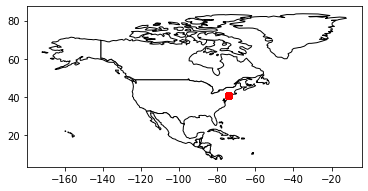

In [18]:
fs_NYC_gpd = gpd.GeoDataFrame(fs_NYC_100, geometry=gpd.points_from_xy(fs_NYC_100.Longitude, fs_NYC_100.Latitude))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# naturalearth_cities, naturalearth_lowres, nybb
# world.plot()
# plt.show()
# North America
# [world.continent == 'New York']
# ,figsize=(30,30)

ax = world[world.continent == 'North America'].plot(color='white', edgecolor='black')

fs_NYC_gpd.plot(ax=ax, color='red')

plt.show()

In [22]:
path_to_data = gpd.datasets.get_path("nybb")
gdf = gpd.read_file(path_to_data)

gdf = gdf.set_index("BoroName")
gdf["area"] = gdf.area
# gdf["area"]
# gdf.plot("area", legend=True)
gdf.explore("area", legend=False)

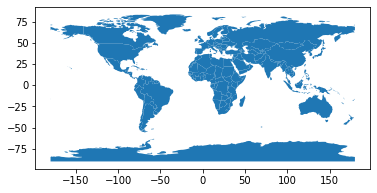

In [1]:
# import pandas as pd
# import geopandas as gpd
# import matplotlib.pyplot as plt
# %matplotlib inline
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# world.plot()
# plt.show()